# Day 5: Introduction to Deep Neural Networks!

In this tutorial, we're going to go over the fundimentals of Neural Networks, specifically focusing on **Dense Neural Networks**. (If you're interested in Convolutional Neural Networks, don't fret! You'll probably enjoy the next lecture ;) )

Neural Networks as a whole are an _incredibly_ broad and complex topic. As we only have half a day today, we're not going to be able to cover much more than the basic ideas and techniques, but the hope is that this provides a stable base for you to continue building your knowledge on top of. If you don't itend to continue much farther down the machine learning rabbit hole, we hope that at the very least, this can serve to de-mystify neural networks/machine learning as a whole :)

**Learning Objectives:**
* Understand Vectors, Matricies, and Dot Product
* Understand how a single layer perceptron works, along with batching and gradient descent.
* Learn how to build and train a simple Deep Neural Network (Multi-Layer Perceptron - MLP) using the TensorFlow/Keras deep learning python framework
* Learn about different optimizers beyond (Stochastic) Gradient Descent and touch on when you might want to use them
* Touch on a few key "Hyperparameters" that you, the human, can and will need to optimize when designing a neural network (Learning Rate, Batch Size, etc.)



In [1]:
# !pip install --upgrade jupyterlab_widgets ipywidgets
# !jupyter nbextension enable --py widgetsnbextension
try:
    from google.colab import output
    output.enable_custom_widget_manager()
except:
    print("Not in Google Colab!")

Not in Google Colab!


In [2]:
from sklearn.datasets import fetch_openml
jet_tagging_data = fetch_openml('hls4ml_lhc_jets_hlf')

# Feedforward Neural Networks

This notebook explains various ways of implementing single-layer and multi-layer neural networks. The implementations are arranged by concrete (explicit) to abstract order so that one can understand the process black-boxed by deep learning frameworks.


## Example Task: Random Function Approximation

Here, we're going to take a basic linear function and attempt to train a neural network to reproduce it. Neural Networks aren't called "Universal Function Approximators" for nothing!


First, We'll Import a few libraries. Numpy for generating data, and Matplotlib/Seaborn for plotting things

In [3]:
import numpy as np
np.random.seed(42) # For reproducibility, we set the "seed" of our random number generator to a fixed number

import matplotlib.pyplot as plt

Next, we'll define a few pieces of information about our training data:
* How many data point (samples)
* The max/min values of our dataset (`train_range` and `max_range`, though note that the values in the dataset are not 0 to max, but -max/2 to max/2) 
* the function we're trying to approximate

After we've done this, we generate it using some useful helper functions from `numpy`, and reshape the data into a shape that our deep learning libraries expect.

you might also notice that we generate two sets of data here, `x`/`y` and `x_test`/`y_test`, where `<x|y>_test` is using a different, larger set of max values than `<x|y>`. In this scenerio, we're doing that to illustrate a point about neural networks, but that isn't (usually) typical for reasons you'll see later. 

In [4]:
samples = 2000
train_range = 100
test_range = 200
def func(x):
    return x**2

x = np.random.random((samples,1))*train_range-(train_range/2)
y = np.array(list(map(func, x))).reshape(-1,1)

x_test = np.random.random((int(samples/2),1))*test_range-(test_range/2)
y_test = np.array(list(map(func, x_test))).reshape(-1,1)

Finally, lets import the building blocks of our neural networks from our deep learning library: Tensorflow/Keras 

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Input, ReLU
from keras.optimizers import Adam
from keras import regularizers
from tqdm.keras import TqdmCallback


## Building the Model 

Think of the model like a sandwich - it always has bread on the top and the bottom and the contents of the sandwich can vary. 
The "bread" in the model is the input and output layers. 
The input layers need to take the features of our dataset, our x values, and translate them in to a format the rest of the model can use. 
The output layers need to take the next to last layer of the model and transform that output into our "target" variables, the y values we can use to evaluate a loss function. 

Our model sandwich below is pretty boring, an input layer, a single learned transformation, and an output layer. 

In `keras`, we can define a model using a `Sequential` object. 
The first layer we "add" after that is the input layer, and then the last layer we add is our output layer. 


The dense layers here are simple, they are a matrix of coefficients that modify the input. 
Those coefficients are trainable, they're the parameters of our model. 
(Like how m and b are the parameters of y = m*x+b)

The [`ReLU`](https://keras.io/api/layers/activation_layers/relu/)("Rectified Linear Unit") layers are an "Activation" function, they change the distribution out of the dense output from a linear output to something slightly more non-linear. 
They can improve the output of the model by increasing how much non-linearity the model can express. 

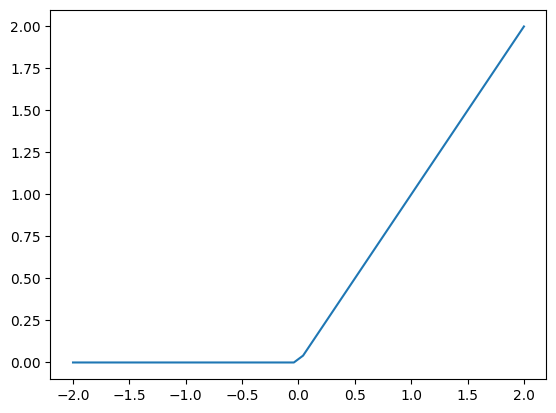

In [6]:
x_ample = np.linspace(-2, 2)
plt.plot(x_ample, ReLU()(x_ample))
plt.show()

In [7]:
model = Sequential() # Define the type of model
model.add(Input((1,))) # Set the input size and shape
model.add(Dense(8)) # Dense layer, holds most of the parameters of the model
model.add(ReLU()) # 
model.add(Dense(8))
model.add(ReLU())
model.add(Dense(1)) # Take the output of the dense layer and project it down into 1d. 

model.compile(optimizer=Adam(),loss='mse') # Information about how the model will be trained
model.summary() # Print out what the model is like and how it's connected to things. 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

## Training the model

Now that we have our model, we can train it on our data! 
* We'll use the `fit` method to train the model, we provide it with our training data and some extra arguments to control a few aspects of the training itself.
    * the `validation_split` parameter to further split our training data into a (final) training set and a new set we call the validation set. We give it a decimal value representing the percent of the training data we've passed the function we want to be used as the new validation set. The purpose of this validation set is to let us/the code monitor the performance of the model on data that the model hasn't "seen" (used to update it's weights) before while the training itself is actually running. By monitoring the performance of the model on the validation set, we can adjust training parameters on the fly to ensure the model doesn't overfit, or otherwise improve performance. 
        * **"Why don't we just use the test data for this purpose?"** - The test data is used to evaluate the model's performance _after_ training is complete, and should not be used during training time to adjust any (hyper)parameters or make any decisions about the model. If we used the test data to adjust the model's parameters, we'd be at risk of overfitting/biasing our model to the test data itself, and we won't actually know how our model performs on totally new, unseen data.
    * the `epochs` parameter to specify how many times the model should go through the entire training dataset. One epoch is one complete pass through all the samples in the training dataset. The more epochs, the more the model will learn, but too many epochs can lead to overfitting.
    * the `batch_size` parameter to specify how many samples the model should use to calculate the gradient at each step. This is part of the gradient descent process, where the model is updated after each batch of samples is passed through the network. Higher values of `batch_size` can help speed up training, but can also lead to a less stable model because the impact of each training sample is reduced, as it's being averaged out across a larger group.
    * the `verbose` parameter to specify how much information the model should output during training. Setting it to `0` will make the model train silently, while setting it to `1` will make the model output a progress bar as it trains. We're using a fancy progess bar here (as explained in the `callbacks` parameter below), so we just suppress the default output.
    * the `callbacks` parameter to specify any extra functions that should be run during training. Here, we're using a `TqdmCallback` to provide a nice progress bar for the training process, but you can also use this to save the model at certain points, or to stop training early if the model isn't improving. 
      
### How does training work?


![Gif of the basic training loop of a neural network](img/training_loop.gif)

The training process is a loop that repeats for a number of epochs, or iterations over our training dataset. The basic structuer of the training loop is as follows:
1. **Forward Pass**: The model takes the input data and passes it through the network to get a prediction.
2. **Loss Calculation**: The model compares the prediction to the true value and calculates a loss, a measure of how far off the prediction was from the true value. The loss is calculated over a number of samples/forward passes, equal to the `batch_size`, to reduce training time and improve stability.
3. **Backward Pass (Backpropagation)**: The model then calculates the gradient of the loss with respect to the model's parameters (the weights and biases of the network) using the chain rule of calculus. This gradient tells the model how much it should adjust each parameter to reduce the loss.
4. **Parameter Update**: The model then updates the parameters using the gradient, moving them in the direction that reduces the loss. This is done using an optimization algorithm, like Stochastic Gradient Descent (SGD) or Adam, which determines how much the parameters should be adjusted based on the gradient. 
5. **Repeat**: The model then repeats this process for the next batch of samples, and continues until it has gone through the entire training dataset. This completes one epoch. The model then repeats this process for the number of epochs specified, or until it's stopped by some other function that's monitoring the training loop.

In [8]:
hist = model.fit(x,y,validation_split=0.2,
             epochs=800,
             batch_size=256, verbose=0, callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [9]:
preds = model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Text(0.5, 1.0, 'Original data')

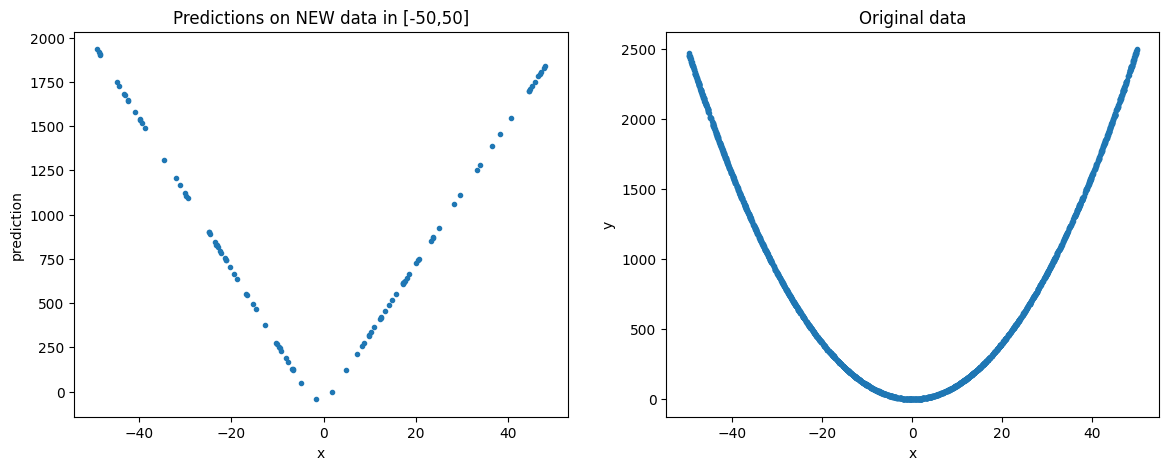

In [10]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
p = np.random.random((100,1))*100-50 # new random data in [-50, 50]
plt.plot(p,model.predict(p), '.')
plt.xlabel('x')
plt.ylabel('prediction')
plt.title('Predictions on NEW data in [-50,50]')

plt.subplot(1,2,2)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,'.')
plt.title('Original data')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step


Text(0.5, 1.0, 'Predictions on NEW data in -50.0 to 50.0')

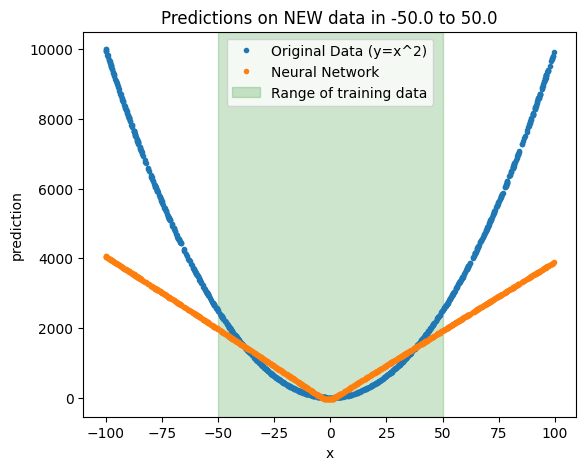

In [11]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(x_test,y_test,".", label="Original Data (y=x^2)")
plt.plot(x_test,model.predict(x_test), '.', label="Neural Network")
plt.axvspan(-50, 50, color='green', alpha=0.2, label="Range of training data")
plt.legend()
plt.xlabel('x')
plt.ylabel('prediction')
plt.title('Predictions on NEW data in {} to {}'.format(-(train_range/2), (train_range/2)))

## Bigger layers

Adding more layers gives the model more to work with, more to optimize. 
It makes training more complicated (more calculations have to be done), but it also lets the model get better results for more complicated data.

We increase the size of the model by changing the unit size in the Dense layer. 
[You can take a look at the Dense layer documentation here.](https://keras.io/api/layers/core_layers/dense/)

In the example below, we are going from 8 units to represent our data to 32. 
The units are just the number of points in the matrix of the dense layer. 

In [12]:
model = Sequential()
model.add(Input((1,))) # Set the input size and shape
model.add(Dense(32)) # Dense layer, holds most of the parameters of the model
model.add(ReLU()) # 
model.add(Dense(32))
model.add(ReLU())
model.add(Dense(1)) # Take the output of the dense layer and project it down into 1d. 

model.compile(optimizer=Adam(),loss='mse')
model.summary()

hist = model.fit(x,y,validation_split=0.2,
             epochs=800,
             batch_size=256, verbose=0, callbacks=[TqdmCallback(verbose=1)])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153 (4.50 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


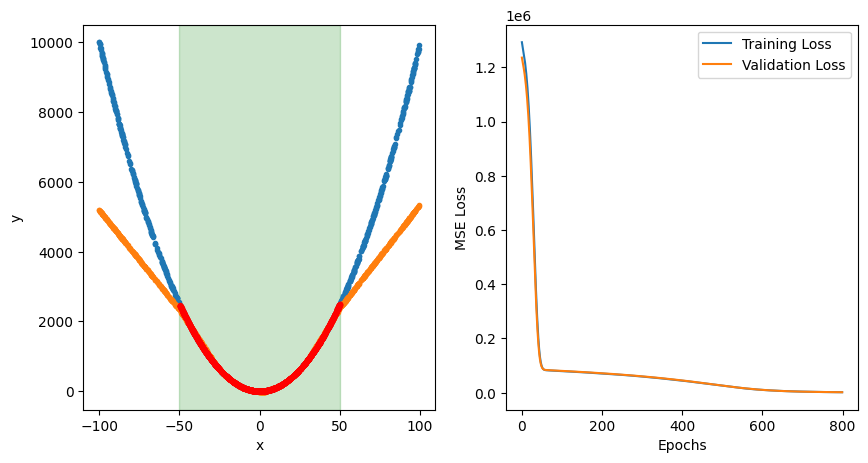

In [13]:
figure, subplots = plt.subplots(1, 2, figsize=(10,5))

subplots[0].plot(x_test,y_test,".", label="Test Data")
subplots[0].plot(x_test,model.predict(x_test), '.', label="Neural Network")
subplots[0].plot(x,y, '.', label="Training Data", color="red")
subplots[0].axvspan(-(train_range/2), (train_range/2), color='green', alpha=0.2, label="Range of training data")
subplots[0].set_xlabel('x')
subplots[0].set_ylabel('y')

train_history = hist.history['loss']
val_history = hist.history['val_loss']

epochs = range(len(train_history))
subplots[1].plot(epochs, train_history, label='Training Loss')
subplots[1].plot(epochs, val_history, label='Validation Loss')
subplots[1].set_xlabel("Epochs")
subplots[1].set_ylabel("MSE Loss")
plt.legend()

## Scaling and/or Normalizing

### Scaling Data

When training a model, the model needs to understand what various inputs mean in relation to one another. Unfortunately, all they model knows is numbers. Because of this, a variable that has a very large scale will get undue importance according to the model. Because of this, we can scale the input to a range that is consistent between all the variables in the model.
In this scale, we'll do it by scaling according to the mean and standard deviation of the variable; using a `StandardScaler`

The standard scaler transforms variables according to the formula:

$$ X_{scaled} = \frac{(X_{original} - \mu)}{ \sigma }$$

In [14]:
samples = 2000
train_range = 200
max_range = 300
def func(x):
    return x**2 + x**3 / 2*x + 8 # Make the problem harder?

x = np.random.random((samples,1))*train_range-(train_range/2)
y = np.array(list(map(func, x))).reshape(-1,1)

x_test = np.random.random((samples,1))*max_range-(max_range/2)
y_test = np.array(list(map(func, x_test))).reshape(-1,1)

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on the training data
scaler.fit(x)

# Transform both the training and test data
X_train = scaler.transform(x)
X_test = scaler.transform(x_test)


In [15]:
model = Sequential()
model.add(Input((1,))) # Set the input size and shape
model.add(Dense(8)) # Dense layer, holds most of the parameters of the model
model.add(ReLU()) # 
model.add(Dense(8))
model.add(ReLU())
model.add(Dense(1)) # Take the output of the dense layer and project it down into 1d. 

model.compile(optimizer=Adam(),loss='mse')
model.summary()

hist = model.fit(x,y,validation_split=0.2,
             epochs=800,
             batch_size=256, verbose=0, callbacks=[TqdmCallback(verbose=1)])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 8)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_6 (ReLU)                  │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step


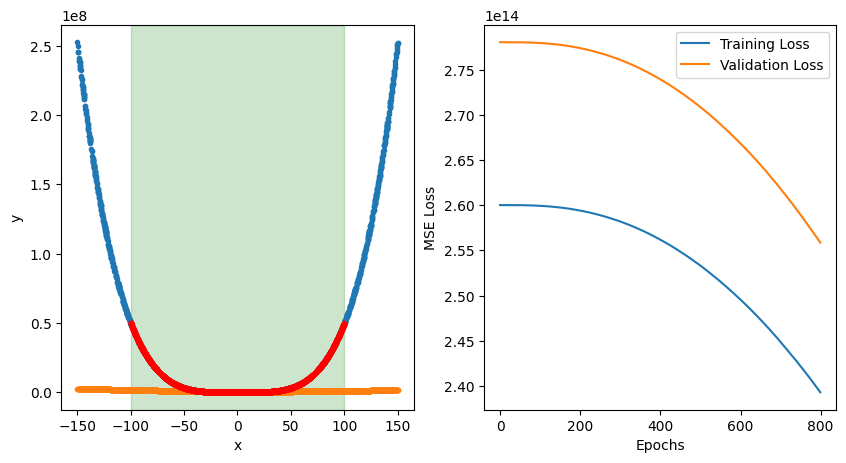

In [16]:
figure, subplots = plt.subplots(1, 2, figsize=(10,5))

subplots[0].plot(x_test,y_test,".", label="Test Data")
subplots[0].plot(x_test,model.predict(x_test), '.', label="Neural Network")
subplots[0].plot(x,y, '.', label="Training Data", color="red")
subplots[0].axvspan(-(train_range/2), (train_range/2), color='green', alpha=0.2, label="Range of training data")
subplots[0].set_xlabel('x')
subplots[0].set_ylabel('y')

train_history = hist.history['loss']
val_history = hist.history['val_loss']

epochs = range(len(train_history))
subplots[1].plot(epochs, train_history, label='Training Loss')
subplots[1].plot(epochs, val_history, label='Validation Loss')
subplots[1].set_xlabel("Epochs")
subplots[1].set_ylabel("MSE Loss")
plt.legend()

## Different Batch Size & Epochs

Batch Size and Epochs are hyperparameters chosen by the ML practitioner during the training. 
There are ways to optimize them, but generally you pick them based on your own preference and problem constraints. 

In [17]:
model = Sequential()
model.add(Input((1,))) # Set the input size and shape
model.add(Dense(8)) # Dense layer, holds most of the parameters of the model
model.add(ReLU()) # 
model.add(Dense(8))
model.add(ReLU())
model.add(Dense(1)) # Take the output of the dense layer and project it down into 1d. 

model.compile(optimizer=Adam(),loss='mse')
model.summary()

hist = model.fit(x,y,validation_split=0.2,
             epochs=2000,
             batch_size=256, verbose=0, callbacks=[TqdmCallback(verbose=1)])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_7 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_8 (ReLU)                  │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153 (4.50 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


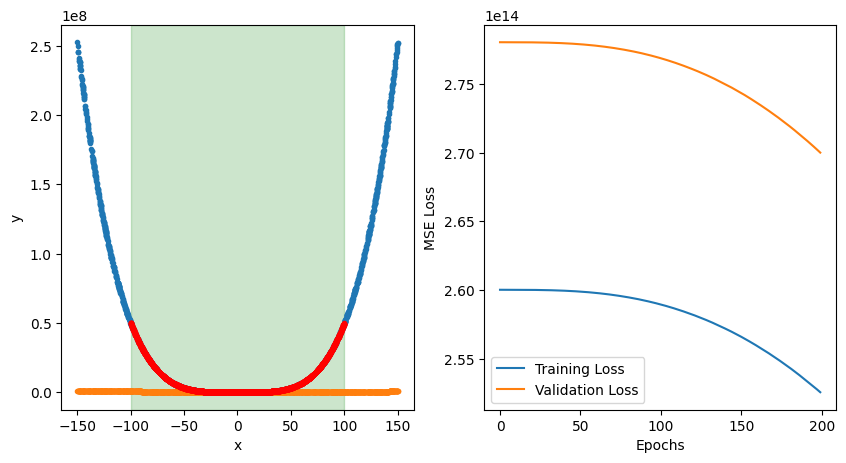

In [18]:
figure, subplots = plt.subplots(1, 2, figsize=(10,5))

subplots[0].plot(x_test,y_test,".", label="Test Data")
subplots[0].plot(x_test,model.predict(x_test), '.', label="Neural Network")
subplots[0].plot(x,y, '.', label="Training Data", color="red")
subplots[0].axvspan(-(train_range/2), (train_range/2), color='green', alpha=0.2, label="Range of training data")
subplots[0].set_xlabel('x')
subplots[0].set_ylabel('y')

train_history = hist.history['loss']
val_history = hist.history['val_loss']

epochs = range(len(train_history))
subplots[1].plot(epochs, train_history, label='Training Loss')
subplots[1].plot(epochs, val_history, label='Validation Loss')
subplots[1].set_xlabel("Epochs")
subplots[1].set_ylabel("MSE Loss")
plt.legend()

### One final note before moving on 
You might've noticed that regardless of what we've done to the model, it's performance on the test data that falls outside the range of it's training data is pretty poor. This is a common issue with neural networks, especially simple dense networks like the one's we've been playing with, and is a good example of how they can struggle with extrapolation. Remember that neural networks _only_ possess the context and information that it's learned from it's training dataset. If the model hasn't seen data that's similar to what it's being asked to predict, it's going to struggle to make accurate predictions. This is why it's important to have a diverse and representative training dataset, and to be aware of the limitations of your model when you're using it to make predictions. Neural networks aren't magic, all knowing, or the answer to all of our problems (despite what silicon valley might otherwise want you to believe ;) ), but they are still an incredibly useful tool to have in your toolbox.

# Classification tasks with neural networks

So far, we've been looking at regression tasks, where the output of our model is a continuous value. But what if we want to classify our data into different categories? This is what we (unsurprisingly) call a classification task! In this case, we have make a few modifications to our model and training:
    * We have to change the output of our model to give us a probability distribution over the different classes
    * We have to use a different loss function to train our model
    * We have to use different metrics to evaluate our model (seperately from the loss function)
    
### Binary Classification vs Multi-Class Classification
There are two fundimental types of classification problems - Binary and Multi-Class. In a binary classification problem, we're trying to classify data into one of two classes, while in a multi-class classification problem, we're trying to classify data into one of many classes. We make this distinction because the way we set up our model and the way we evaluate it can change depending on the number of classes we're trying to predict. In this case, we have 5 classes, so we're doing a multi-class classification task.

### Softmax Activation
In a multi-class classification task, the output of our model is typically a probability distribution over the different classes. To do this, we set our output layer to have the same number of neurons of classes that we have, and for it's activation function, we use the **Softmax Activation Function**. The softmax function takes the raw output of our model and squashes it into a probability distribution, where the sum of the probabilities of each class is equal to 1. This allows us to interpret the outputs of our model as the percentage chance that a given input belongs to each class.

### Categorical Crossentropy Loss
To train a model for a multi-class classification task, we use a loss function called **Categorical Crossentropy**. This loss function compares the probability distribution output by our model to the true distribution of the data, and calculates a loss based on how far off the model's prediction is from the true value. The goal of training the model is to minimize this loss, so that the model's predictions are as close to the true values as possible.

### Metrics
When evaluating a model for a classification task, we typically use a few different metrics to understand how well the model is performing. Some common metrics include:
* **Accuracy**: The overall ratio of correct guesses/total guesses. 100% is perfect, and 100/number of classes (so in our particle physics example case, 100/5 classes = 20%) is "worst case", 
as it's statistically no better than picking a label at random.
* **Confusion Matrix**: This is a specific kind of plot that shows how many samples of a given class were predicted as what, for every class. The axis of this plot are "True" and "Predicted",
usually showing the number or percentage of the samples guessed as such in each cell of the plot. This shows a more detailed breakdown of what the model is guessing, and where it might be confusing two or more classes
* **Receiver Operating Characteristic curve aka ROC curve**: This is a plot of the true positive rate (sensitivity) vs the false positive rate (1-specificity) for a binary classification task. 
It shows how well the model is able to distinguish between the two classes, and is a good way to evaluate the performance of a binary classifier. In the case of a multi-class classifier, 
we can plot a ROC curve for each class against all the others, or use a One-vs-All approach to plot a single ROC curve for the entire model.
* **(ROC) Area Under the Curve, aka (ROC)AUC**: This is simply a way to distill the ROC into a single value, and as the name implies, is effectively just taking the integral of the ROC curve. 
100% is the best case scenerio, and 50% is the worst case scenerio.


## Particle Physics Example: Jet Tagging

<img src="img/jet_tagger_jets.png" alt="2D Representations of the different kinds of particle jets the neural network will classify" style="background-color:white; width: 800px;"/>

In this example, we'll be looking at a "simple" high energy physics task - **Jet Tagging**

In a particle collider, Jets are sprays of hadrons produced in very high-energy particle collisions. We're interested in determining what kind of particle produced a given jet. As the above image shows, we have 5 different kinds of jets that we want to classify (tag).

We have 16 **features**, that we have measured and/or calculated from collisions in the Large Hadron Collider that we will feed into our neural network, asking it to guess which one of the 5 possible particles was responsible for a given jet.  

### Multi-Layer Perceptron - Your first Deep Neural Network!

<img src="img/jet_tagger_mlp.png" alt="Graph of the Jet Tagger MLP Neural Network" style="background-color:white; width: 400px;"/>

The neural network that we're going to use to accomplish this is what we call a 3 **hidden layer** network, meaning there are 3 layers of neurons "hidden" between the input and the output of the network.

But, we still have some work to do before building and training our network!

In [19]:
#Import some tensorflow tools we need
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [20]:
# load the dataset
data = jet_tagging_data
X, y = data['data'], data['target']

In [21]:
# look at some example data
print(data['feature_names'])
print(X.shape, y.shape)
print(X[:5])
print(y[:5])

['zlogz', 'c1_b0_mmdt', 'c1_b1_mmdt', 'c1_b2_mmdt', 'c2_b1_mmdt', 'c2_b2_mmdt', 'd2_b1_mmdt', 'd2_b2_mmdt', 'd2_a1_b1_mmdt', 'd2_a1_b2_mmdt', 'm2_b1_mmdt', 'm2_b2_mmdt', 'n2_b1_mmdt', 'n2_b2_mmdt', 'mass_mmdt', 'multiplicity']
(830000, 16) (830000,)
      zlogz  c1_b0_mmdt  c1_b1_mmdt  c1_b2_mmdt  c2_b1_mmdt  c2_b2_mmdt  \
0 -2.935125    0.383155    0.005126    0.000084    0.009070    0.000179   
1 -1.927335    0.270699    0.001585    0.000011    0.003232    0.000029   
2 -3.112147    0.458171    0.097914    0.028588    0.124278    0.038487   
3 -2.666515    0.437068    0.049122    0.007978    0.047477    0.004802   
4 -2.484843    0.428981    0.041786    0.006110    0.023066    0.001123   

   d2_b1_mmdt  d2_b2_mmdt  d2_a1_b1_mmdt  d2_a1_b2_mmdt  m2_b1_mmdt  \
0    1.769445    2.123898       1.769445       0.308185    0.135687   
1    2.038834    2.563099       2.038834       0.211886    0.063729   
2    1.269254    1.346238       1.269254       0.246488    0.115636   
3    0.966505  

## Data pre-processing
As it stands, our data isn't quite ready to feed into a network. We need to do a little bit of work ahead of time (**preprocessing**) to format the data and apply some statistical methods to make things easier for the network to understand.

### Scaling Data



When training a model, the model needs to understand what things mean physically. Unfortunately, all they model knows is numbers. Because of this, a variable that has a very large scale will get undue importance according to the model. Because of this, we can scale the input to a range that is consistent between all the variables in the model.
In this scale, we'll do it by scaling according to the mean and standard deviation of the variable; using a `StandardScaler`

The standard scaler transforms variables according to the formula:

$$ X_{scaled} = \frac{(X_{original} - \mu)}{ \sigma }$$

### One-Hot Encoding

Models cannot natively understand strings (words, letters, etc), only numbers. Because of this, we need to give them a little bit of help by encoding labels. When labels do not have any sort of order, we transform them using one-hot encoding.

A set of labels ` labels = ['a', 'b', 'c']` will be transformed into the binary logic -

| | $a$ | $b$ | $c$ |
| :---: | :---: |:---: | :---: |
|1 | 1 | 0 | 0 |
|2 | 0 | 1 | 0 |
|3 | 0 | 0 | 1 |


In [22]:
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y, 5)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y[:5])

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]


In [23]:
scaler = StandardScaler()
X_train_val = scaler.fit_transform(X_train_val)
X_test = scaler.transform(X_test)

## Writing our MLP in Keras

We'll define our MLP using a `functional` api. This means we'll define the model layer by layer, and connect them together.

The model is built out of 3 dense layers with an activation between each of them. Here, we're using an activation function called **ReLU**, which stands for **Rectified Linear Unit**, and is generally one of the more "standard" activation functions you'll see used.

In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, ReLU, Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1

In [25]:
input_layer = Input(shape=(16,), name='input')
x = Dense(64,name='fc1', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001))(input_layer)
x = ReLU()(x)
x = Dense(32,name='fc2', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001))(x)
x = ReLU()(x)
x = Dense(32, name='fc3', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001))(x)
x = ReLU()(x)
x = Dense(5, name='output', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001))(x)
output = Softmax()(x)

model = Model(input_layer, output)

In [26]:
model.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_9 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_10 (ReLU)                 │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc3 (Dense)                     │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_11 (ReLU)                 │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 5)              │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 5)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,389 (17.14 KB)

 Trainable params: 4,389 (17.14 KB)

 Non-trainable params: 0 (0.00 B)

## Training our MLP

To train the model, we define the training optimizer (how the weights will be updated, instead of using SGD, we can pick anything), the loss being used (this is a classifier model, so we'll use a classifier loss), and the data being used to train it.

In [27]:
# Compile our model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss=['categorical_crossentropy'], metrics=['accuracy'])

In [28]:
# Train!
history = model.fit(
    X_train_val, # Input data
    y_train_val, # Truth Output data
    batch_size=1024, # Batch Size
    epochs=30, # How many times will we iterate over the whole training dataset to train the model?
    validation_split=0.25, # How much of the train dataset do we want to reserve as our validation split?
    shuffle=True
).history #Do we want to to order of our training samples to be shuffled?

Epoch 1/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3270 - loss: 1.5825 - val_accuracy: 0.5530 - val_loss: 1.1690
Epoch 2/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6091 - loss: 1.1183 - val_accuracy: 0.6961 - val_loss: 1.0116
Epoch 3/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7019 - loss: 0.9829 - val_accuracy: 0.7102 - val_loss: 0.9288
Epoch 4/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7147 - loss: 0.9115 - val_accuracy: 0.7204 - val_loss: 0.8859
Epoch 5/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7227 - loss: 0.8746 - val_accuracy: 0.7251 - val_loss: 0.8628
Epoch 6/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7260 - loss: 0.8555 - val_accuracy: 0.7286 - val_loss: 0.8482
Epoch 7/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7305 - loss: 0.8405 - val_accuracy: 0.7315 - val_loss: 0.8368
Epoch 8/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7330 - loss: 0.8291 - val_accuracy: 0.

Text(0, 0.5, 'Loss')

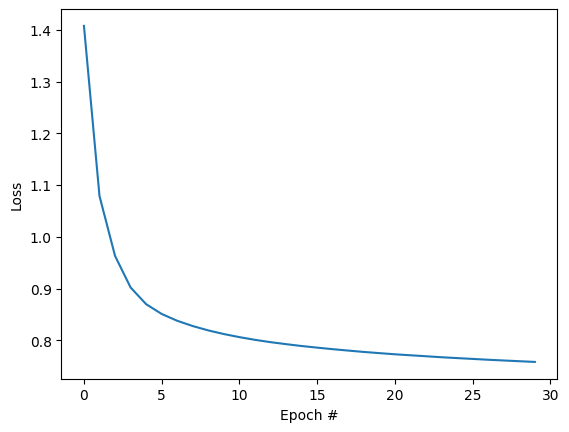

In [29]:
import matplotlib.pyplot as plt

loss_history = history['loss']
epochs = range(len(loss_history))
plt.plot(epochs, loss_history)
plt.xlabel('Epoch #')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

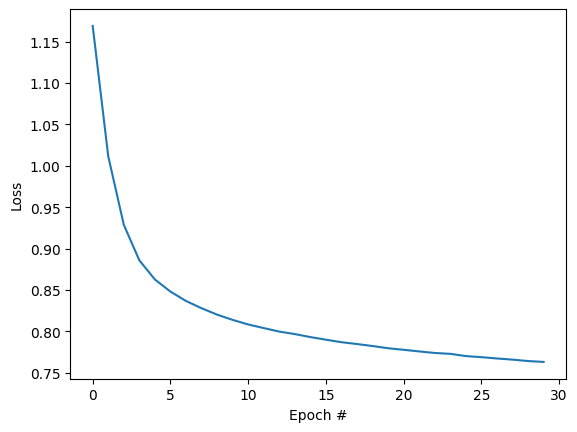

In [30]:
loss_history = history['val_loss']
epochs = range(len(loss_history))
plt.plot(epochs, loss_history)
plt.xlabel('Epoch #')
plt.ylabel('Loss')

## Check model performance

Now that we've trained our model, we need to check and verify how well it does!
To do this, we first will be calculating all these performance numbers based on a **Test Set** of data we specifically held out from the training dataset.

We can, and should, use multiple different metrics to evaluate how well our model does. **One metric is not enough to sufficiently represent how our model does!!**

Specifically, we're going to look at: (yes this section looks familiar :) )
* **Accuracy**: The overall ratio of correct guesses/total guesses. 100% is perfect, and 100/number of classes (so in our particle physics example case, 100/5 classes = 20%) is "worst case", 
as it's statistically no better than picking a label at random.
* **Confusion Matrix**: This is a specific kind of plot that shows how many samples of a given class were predicted as what, for every class. The axis of this plot are "True" and "Predicted",
usually showing the number or percentage of the samples guessed as such in each cell of the plot. This shows a more detailed breakdown of what the model is guessing, and where it might be confusing two or more classes
* **Receiver Operating Characteristic curve aka ROC curve**: This is a plot of the true positive rate (sensitivity) vs the false positive rate (1-specificity) for a binary classification task. 
It shows how well the model is able to distinguish between the two classes, and is a good way to evaluate the performance of a binary classifier. In the case of a multi-class classifier, 
we can plot a ROC curve for each class against all the others, or use a One-vs-All approach to plot a single ROC curve for the entire model.
* **(ROC) Area Under the Curve, aka (ROC)AUC**: This is simply a way to distill the ROC into a single value, and as the name implies, is effectively just taking the integral of the ROC curve. 
100% is the best case scenerio, and 50% is the worst case scenerio.




In [31]:
import itertools
from sklearn.metrics import auc, roc_curve, accuracy_score, confusion_matrix
import pandas as pd
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    # plt.title(title)
    cbar = plt.colorbar()
    plt.clim(0, 1)
    cbar.set_label(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    # plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def plotRoc(fpr, tpr, auc, labels, linestyle, legend=True):
    for _i, label in enumerate(labels):
        plt.plot(
            tpr[label],
            fpr[label],
            label='{} tagger, AUC = {:.1f}%'.format(label.replace('j_', ''), auc[label] * 100.0),
            linestyle=linestyle,
        )
    plt.semilogy()
    plt.xlabel("Signal Efficiency")
    plt.ylabel("Background Efficiency")
    plt.ylim(0.001, 1)
    plt.grid(True)
    if legend:
        plt.legend(loc='upper left')
    plt.figtext(0.25, 0.90, 'Jet Tagging MLP Performance', fontweight='bold', wrap=True, horizontalalignment='right', fontsize=14)


def rocData(y, predict_test, labels):
    df = pd.DataFrame()

    fpr = {}
    tpr = {}
    auc1 = {}

    for i, label in enumerate(labels):
        df[label] = y[:, i]
        df[label + '_pred'] = predict_test[:, i]

        fpr[label], tpr[label], threshold = roc_curve(df[label], df[label + '_pred'])

        auc1[label] = auc(fpr[label], tpr[label])
    return fpr, tpr, auc1


def makeRoc(y, predict_test, labels, linestyle='-', legend=True):
    if 'j_index' in labels:
        labels.remove('j_index')

    fpr, tpr, auc1 = rocData(y, predict_test, labels)
    plotRoc(fpr, tpr, auc1, labels, linestyle, legend=legend)
    return predict_test


5188/5188 ━━━━━━━━━━━━━━━━━━━━ 4s 772us/step
Accuracy: 0.7506807228915663


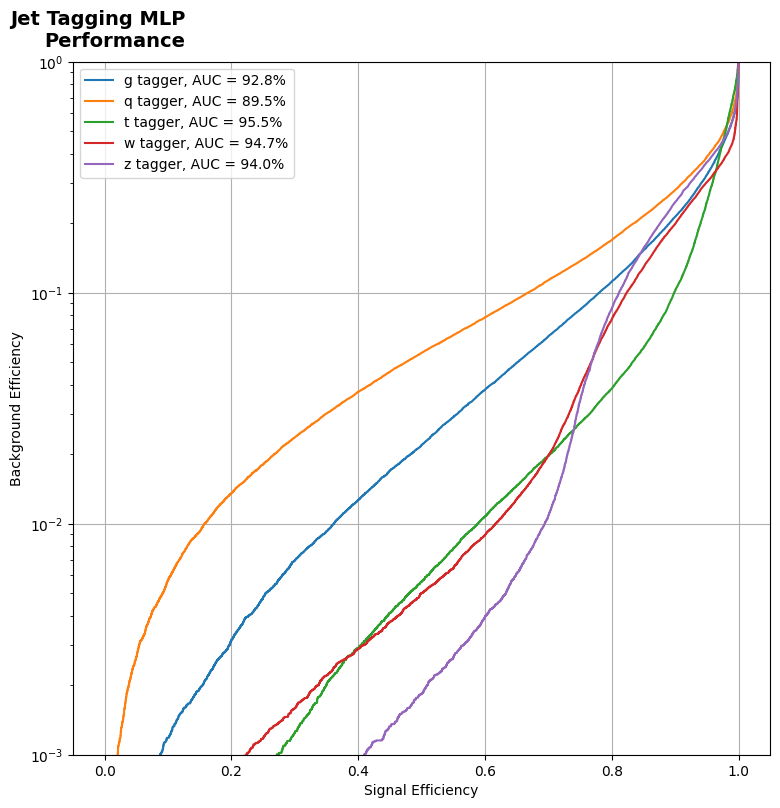

In [32]:
y_keras = model.predict(X_test)
print("Accuracy: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_keras, axis=1))))
plt.figure(figsize=(9, 9))
_ = makeRoc(y_test, y_keras, le.classes_)

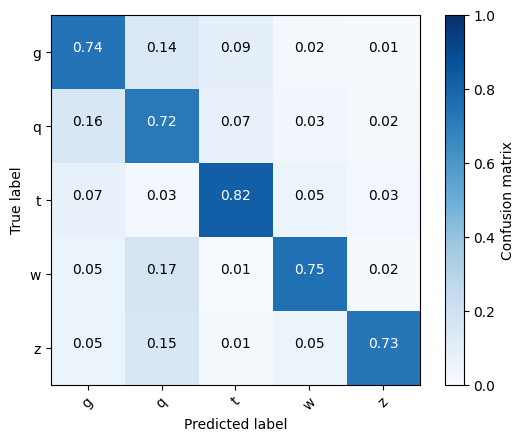

In [33]:
y_cm = np.argmax(y_keras, axis=1)
y_cm_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_cm_true, y_cm)
plot_confusion_matrix(cm, le.classes_, normalize=True)

## Attribution, Sources, and Credits

This notebook was derived from two, seperate notebooks from the Tokyo Institute of Technology's ART.T458: Advanced Machine Learning course, and were originally authored by Prof. Naoaki Okazaki.

The original notebooks (and accompanying material) can be found here: https://chokkan.github.io/deeplearning/

The Jet Tagging MLP portion was adapted from [the hls4ml tutorial part 1 notebook](https://github.com/fastmachinelearning/hls4ml-tutorial/blob/main/part1_getting_started.ipynb)

Modifications to this notebook were done by Ben Hawks for the 2023 Fermilab and Brookhaven National Lab Summer Exchange School

Various sources for images and other materials used is listed below:
1. [Matrix Transpose Gif by Lucas Vieira via Wikipedia](https://commons.wikimedia.org/wiki/File:Matrix_transpose.gif)
3. [Boolean Logic Gates Image/Symbols (Digilent) ](https://digilent.com/blog/logic-gates/)
    * Original/Individual Symbols used (IEEE Std 91/91a-1991 "Distinctive Shapes") are originally via [Inductiveload via Wikipedia](https://en.wikipedia.org/wiki/Logic_gate#Symbols)

## Appendix - Math and Definitions  

## Notation, Terms, and other background info
In this notebook, you'll likely see some new symbols, terminology, and other topics that you haven't come across before. Don't be afraid!

Most of the math symbols you see here simply function as *shorthand* for different math concepts, so that we can write an equation using these concepts without needing to define "generic" variables or functions every time we reference them. We've compiled a list of these terms here for you to reference when needed, but at least skimming through these before continuing is reccomended.

Additionally, there are some math concepts that are useful to know about/have a basic understanding of, as they're used quite heavily in this notebook (and Neural Networks/Machine Learning in general!)

We're going to assume that you have a baseline level of knowledge regarding some math concepts, but if you run into something that you don't understand (regardless of if it's defined here or not!), please let us know and we'll be happy to explain it! Additionally, some definitions of terms might include Machine Learning concepts that are covered later in the notebook (e.g. *Activation Functions*), we'll include another list of terms/symbols that are covered as part of this notebook at the end, so for now don't worry too much if you run into one of these terms.

## Math Concepts

###  Vectors & Scalars
a **vector** is a kind of variable that not only has a value (aka *magnitude*), but also a *direction*. One common way to represent and define vectors that we'll use is by stating the change along each axis (the *components*) the vector travels in (in 2D, this would be $x$ and $y$ *components*, in 3D, the $x$, $y$ and $z$ *components* ).

This can be written as $\vec{v} = (x,y)$ _or_ as $\boldsymbol{v} = (x,y)$ (note the second $v$ is bolded). Sometimes, the *components* are written stacked vertically such as $\vec{v} = \begin{pmatrix} x\\ y\\ \end{pmatrix}$

In this format, calculating the *magnitude* of a vector, written as $| \vec{v} |$, is done by applying the pythagorean theorm!

<img src="img/vector_components.png" alt="Plot labeling the components of a vector, plus the definition for mangitude" style="background-color:white; width:400px;" />

* You can add or subtract vectors to/from vectors, this will produce a vector as a result ( the *resultant*)
* Multiplication of a Vector with a Scalar produces a vector
* Multiplication of Vectors with Vectors can produce either:
    * Another Vector, by calculating the *Cross Product*: $\vec{v} \times \vec{b} = \vec{vb}$
    * a *Scalar*, by calculating the *Dot Product*: $\vec{v} \cdot \vec{b} = vb$
* You cannot divide with vectors
    
a **scalar** is a normal value, without a direction. Scalars are considered to only have a *magnitude*. Most math you know and have done throughout school has been **scalar** math :)


### Matrix/Matrices
a **Matrix** is a _structured_ table/an array of numbers. Location of each element matters, and they can be **1 or more dimensions** in shape. Matricies are generally labeled as capital/uppercase letters, and are represented with it's elements placed in a rectangular grid, encapsulated by large square brackets $[  ]$ or parenthesis $(  )$  A Matrix with $m$ rows and $n$ columns can be written as    
$$
A = [a_{m,n}] = \begin{bmatrix}
  {a}_{1,1} & \dots & {a}_{1,n}\\
  \vdots & \ddots & \vdots\\
  {a}_{m,1} & \dots & {a}_{m,n}\\
\end{bmatrix} = \begin{pmatrix}
  {a}_{1,1} & \dots & {a}_{1,n}\\
  \vdots & \ddots & \vdots\\
  {a}_{m,1} & \dots & {a}_{m,n}\\
\end{pmatrix}
$$

So if we set $m=4$ and $n=2$
$$
A = [a_{4,2}] = \begin{bmatrix}
  {a}_{1,1} & {a}_{1,2}\\
  {a}_{2,1} & {a}_{2,2}\\
  {a}_{3,1} & {a}_{3,2}\\
  {a}_{4,1} & {a}_{4,2}\\
\end{bmatrix} = \begin{pmatrix}
  {a}_{1,1} & {a}_{1,2}\\
  {a}_{2,1} & {a}_{2,2}\\
  {a}_{3,1} & {a}_{3,2}\\
  {a}_{4,1} & {a}_{4,2}\\
\end{pmatrix}
$$

Where ${a}_{i,j}$ (no brackets/parentheses) refers to a single element in the matrix, where $i$ refers to the row and $j$ refers to the column

* Sometimes, we'll talk about *transposing* a matrix, which means we flip it along it's diagonal axis! When transposing a matrix, we swap the values of $m$ and $n$ and move the elements of the matrix to match. We refer to the transposed version of a matrix by adding a superscript of $T$ to it. For example
<center><img src="img/Matrix_transpose.gif" alt="Animation of a matrix being transposed"/></center>
$$
A = [a_{3,2}] = \begin{bmatrix}
  1 & 2\\
  3 & 4\\
  5 & 6\\  
\end{bmatrix} \quad  A^{T} = [a^{T}_{2,3}] = \begin{bmatrix}
  1 & 3 & 5 \\
  2 & 4 & 6 \\
\end{bmatrix}
$$


* A 1-Dimensional matrix (where either $n=1$ or $m=1$) can also be called a **row vector** (when shape = $m \times 1$) or a **column vector** (when shape = $1 \times n$), and transposing one kind turns it into the other. These can be _treated_ like vectors (such as when you're performing certain operations), but are still matricies. A key point is that a *vector* **can not** be transposed, but a *matrix* can. (Yes this is confusing, this distinction won't come up today, but is important with Linear Algebra in general)
$$
A = [a_{4,1}] = \begin{bmatrix}
  1 \\
  2 \\
  3 \\
  4 \\
  \end{bmatrix} \quad B = [b_{1,4}] = \begin{bmatrix}
  5 & 6 & 7 & 8\\
\end{bmatrix}
$$

* **Importantly,** you can/will see some matricies represented in the form of a *column vector*, functioning as a ***table*** of vectors. You have to be careful in this distinction, as it's shorthand that needs to be expanded before performing operations on it as a matrix. For example, if we have a matrix $A = [a_{4,3}]$, we can write it as a table of 2-Dimensional vectors $\vec{a_n} = (x,y)$ like so:

$$
A = [a_{4,2}] = \begin{bmatrix}
  \vec{a_1} \\
  \vec{a_2} \\
  \vec{a_3} \\
  \vec{a_4} \\
  \end{bmatrix} = \begin{bmatrix}
  {a_1}_x & {a_1}_y\\
  {a_2}_x & {a_2}_y\\
  {a_3}_x & {a_3}_y\\
  {a_4}_x & {a_4}_y\\
  \end{bmatrix} = \begin{bmatrix}
  {a}_{1,1} & {a}_{1,2}\\
  {a}_{2,1} & {a}_{2,2}\\
  {a}_{3,1} & {a}_{3,2}\\
  {a}_{4,1} & {a}_{4,2}\\
  \end{bmatrix}
$$

### Dot Product
The dot product of two matricies is simply the sum of each corresponding element multiplied together, defined as such:

$ \mathbf a \cdot \mathbf b = \sum_{i=1}^n a_i b_i = a_1 b_1 + a_2 b_2 + \cdots + a_n b_n $



***Variable/Function Definitions - ML/Notebook Specific***
Most of these symbols are common across Machine Learning/Neural Network literature, but there still might be slight variations. For the purposes of this notebook, these variables are defined as follows

Dataset Related Variables:
* $\vec{x}$ - An **unmodified** *input* vector, these make up the inputs to our neural network
* $\vec{x_n}$ - pronounced "*x n*", e.g. "x 1", "x 2", etc. - a specific input matrix (feature), e.g. $\vec{x_1}$, $\vec{x_2}$, etc. (this also applies to other forms of $\vec{x}$, $\vec{y}$, and $\vec{w}$ such as $\vec{x'}$ and $\vec{\hat{y}}$ )
* $\vec{x'}$ - pronounced *"x prime"* - Generally a modified value of x (derivitive of, though not speciifcally in the Calculus sense :) ), usually referring to the output of an intermediete step during pre-processing, an operation within a *hidden layer* of a neural network, or the output of the *hidden layer* itself
* $\vec{y}$ - A truth vector, containing whatever the _actual truth values_ that the neural network is trying to learn to replicate.
* $\vec{\hat{y}}$ - pronounced *Y Hat* - the **modified**/**final** output vector of our neural network, usually after we apply an *activation function*
* ${X}$ - (Capital/Uppercase X) - the _input_ matrix for our neural network, comprised of all input vectors ($x$)
* $\hat{Y}$ - (Capital/Uppercase Y Hat) - the _output_ matrix for our neural network, comprised of all output vectors ($\hat{y}$) from our neutral network.

Neural Network Related Variables/Functions:
* $\vec{w}$ - a *weight* vector, a _learned parameter_ that a neural network learns during the training process.  
* $b$ - a *bias* scalar, a _learned parameter_ that a neural network learns during the training process.
* $g(...)$ - an *activation function*, used to add *non linear behavior* to the network. This can represent one of multiple different functions (such as Step, ReLU, Sigmoid, TanH, etc. see the "Activation Functions" link in *Other Resources* above!), depending on the context and architecture of a given neural network.

* $Q(...)$ - a *loss function*, used to calculate how far off one varaible

***Math Symbols/Definitions***
This notation is pretty general and shared across most math literature you'll find, but it's important to check specific meanings regardless, **ESPECIALLY** if this notation is being used in other contexts/fields (Outside ML, Discrete Math, and Linear Algebra)
* $\in$ - pronounced as "in" - A symbol denoting that the value of a mentioned variable (usually $x$, $y$, etc.) exists within/is bounded by some set of numbers, meaning that it will _always_ be within that set and never be anything that's not part of it.
* $\{a, b, c\}$ - pronounced "set of ..." - This is specificlly defined set (list) of numbers, usually used in conjunction with the above "in"/ $\in$ symbol. (Note the curly braces $\{ \}$)
* $\mathbb{R}$ - pronounced "\<the set of> all real numbers" - This symbol represents the set of **all** real numbers, usually used in conjunction with the above "in"/ $\in$ symbol.
* In this notebook, we also use the notation $\mathbb{R}^d$ or $\{a, b, c\}^d$  , where $d$ indicates the dimensions/shape of whatever the variable we're referencing (Outside of this notebook, $\mathbb{R}^n$ is often the same meaning where $d$ = $n$).
    * e.g. $\hat{Y} \in \mathbb{R}^{4 \times 1}$ means that a ***matrix*** $\hat{Y}$ in the shape of "${4 \times 1}$", where each element of the matrix is a real number (part of the set $\mathbb{R}$)
    * e.g. $\vec{x} \in \mathbb{R}^2$ is a ***vector*** $\vec{x}$ in $2$ dimensional space, where the possible values of the vector's *components* are all real numbers.
    * e.g. $\vec{x} \in \{0,1\}^2$ is a ***vector*** $\vec{x}$ in $2$ dimensional space, where the possible values of the vector's *components* are either $0$ or $1$.  
    * e.g. $\vec{\hat{y}} \in \{0,1\}$ is a ***vector*** $\vec{\hat{y}}$ in $1$ dimensional space, where the possible values of the vector's *component* is either $0$ or $1$
    * e.g. $\{0,1\}^2$ is a ***vector*** (that's unnamed) in $2$ dimensional space, where the possible values of the vector's *components* are either $0$ or $1$.  
* $\nabla$ - The Greek letter Nabla - This symbol denotes the _gradient_ of a given function, which is a vector that describes the direction that increases the fastest from that given point. It's coordinates are the _partial derivatives_ of that function at a given point.